In [24]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# load files
listingsSanFran = "Resources/san francisco/airbnb_listings.csv"

listingsSanFran_df = pd.read_csv(airbnb_data)

In [26]:
# common variables
mean_price_city_SanFran = round(listingsSanFran_df['price'].mean(),2)
mean_reviews_SanFran = round(listingsSanFran_df['review_scores_rating'].mean(),2)
total_reviews_SanFran = listingsSanFran_df['review_scores_rating'].count()
avg_availability_SanFran = listingsSanFran_df['availability_365'].mean()
total_bookings_SanFran = listingsSanFran_df['id'].value_counts().sum()

# fun data bits
average_cleanliness_SanFran = listingsSanFran_df["review_scores_cleanliness"].mean()
most_expensive_airbnb_SanFran = listingsSanFran_df.loc[listingsSanFran_df["price"] == listingsSanFran_df["price"].max(),["name","listing_url","price","review_scores_rating"]]


In [31]:
# airbnb price average by room type, zip code, and location
airbnb_price_roomtype = listingsSanFran_df[["room_type","price"]].groupby("room_type")["price"].mean()
airbnb_price_zip = listingsSanFran_df[["zipcode","price"]].groupby("zipcode")["price"].mean()

# average location score by neighbourhood and zip code
average_location_score_by_neighbourhood_SanFran = listingsSanFran_df[["neighbourhood","review_scores_location"]].groupby("neighbourhood")["review_scores_location"].mean()
average_location_score_by_zip_SanFran = listingsSanFran_df[["zipcode","review_scores_location"]].groupby("zipcode")["review_scores_location"].mean()

# average availability of airbnbs in a year
room_type_group_SanFran = listingsSanFran_df.groupby(["room_type"])
average_availability_year_SanFran = room_type_group_SanFran["availability_365"].mean()

# average room type count by neighbourhood
avg_count_room_type_SanFran = listingsSanFran_df.groupby(['neighbourhood'])['room_type'].count()

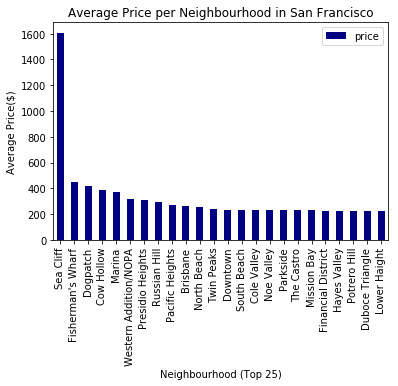

In [36]:
# Price by location. Don't use the commented-out lines of code
price_location_df_SanFran = listingsSanFran_df
remove_nan_vals = [True if type(item)==str else False for item in price_location_df_SanFran["neighbourhood"]]
price_location_df_SanFran = price_location_df_SanFran.loc[remove_nan_vals,:]

#airbnb_price_location_SanFran = price_location_df_SanFran[["neighbourhood", "price"]].groupby("neighbourhood")["price"].mean()

#xtick = [0,55]
#x_labels = ["Alamo Square","Brisbane","Cow Hollow","Dogpatch","Financial District","Haight-Ashbury","Japantown","Mission Bay","Noe Valley","Pacific Heights","Presidio","Sea Cliff","Telegraph Hill","Union Square"]

#plt.bar(price_location_df_SanFran["neighbourhood"].unique(), airbnb_price_location_SanFran)
#plt.xticks(np.arange(min(xtick), max(xtick)+1, 4), x_labels, rotation = 90)
#plt.title("Average Price per Neighbourhood in San Francisco")
#plt.xlabel("Neighbourhood")
#plt.ylabel("Average Price($)")
#plt.show()

price_by_location = price_location_df_SanFran.groupby(['neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)

pbl_new = price_by_location.iloc[0:24,:]
pbl_price_list = pbl_new['price'].tolist()

xticks = np.arange(0, len(pbl_new),1)
xlabels = pbl_new['neighbourhood'].tolist()

pbl_new.plot(x='neighbourhood', y='price', kind='bar', color = 'navy')
#plt.xticks(xticks, xlabels, rotation = 90)
plt.title("Average Price per Neighbourhood in San Francisco")
plt.xlabel("Neighbourhood (Top 25)")
plt.ylabel("Average Price($)")
plt.savefig("Output/price_by_location_sanfran.png",bbox_inches = "tight")
plt.show()


In [33]:
#[True if type(item)==str else False for item in price_location_df["neighbourhood"]]

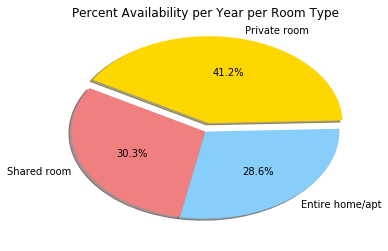

In [37]:
# Building Pie Chart
labels = ["Shared room", "Entire home/apt", "Private room"]
explode = (0.0, 0.0, 0.1)
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(average_availability_year_SanFran,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("Percent Availability per Year per Room Type")
plt.savefig("Output/average_availability_roomtype_sanfran.png")
plt.show()


In [35]:
most_expensive_airbnb_SanFran

,name,listing_url,price,review_scores_rating
5954,"Full House Victorian: 7500 SqFt, 4 Floors, Hot...",https://www.airbnb.com/rooms/24650875,10000,100.0
